# Import Packages for Scraping the Web

In [104]:
import requests
from bs4 import BeautifulSoup
import pickle

# Scrape Data From https://scrapsfromtheloft.com/comedy/ Website

In [135]:
def scrapeURL_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text


# Url to be extracted
urls = ['https://scrapsfromtheloft.com/2017/04/11/eddie-murphy-delirious-full-transcript/', #Eddie
        'https://scrapsfromtheloft.com/2017/04/22/trevor-noah-afraid-dark-2017-full-transcript/', # Trevor Noah
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/2017/04/20/dave-chappelle-deep-heart-texas-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']


#Names
comedians = ['EddieMurphy', 'Trevor Noah', 'ricky', 'dave', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']


In [136]:
# Request the following transcripts
transcripts = [scrapeURL_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2017/04/11/eddie-murphy-delirious-full-transcript/
https://scrapsfromtheloft.com/2017/04/22/trevor-noah-afraid-dark-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2017/04/20/dave-chappelle-deep-heart-texas-2017-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/201

In [137]:
# Make a new directory to hold text files (pickle)
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: transcripts: File exists


In [138]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [139]:
# Check dictionary data 
data.keys()

dict_keys(['EddieMurphy', 'Trevor Noah', 'ricky', 'dave', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [140]:
# Check transcript for 
data['EddieMurphy'][:3] 

['Filmed on August 17, 1983 at DAR Constitution Hall in Washington D.C.',
 'Ladies and gentlemen! Eddie Murphy!',
 'Thank you. Thank you so much. Two times, far two times. Before I even get started how about a big round of applause for the Bus Boys. There’s some rules, I got some rules when I show down and I do my standup, I got rules and shit. Faggots aren’t allowed to look at my ass while I’m on stage! That’s why I keep moving while I’m up here. You don’t know where the faggot section is, you gotta keep movin’. So if they do see it, quick, you switch, they don’t get no long stares at your shit… …so that their imagination is flowing about my… I know when you’re looking, ‘cos my ass starts to get hot. I’m afraid of gay people. Petrified. I have nightmares about gay people. I have this nightmare that I go to Hollywood and find out that Mr. T is a faggot. Really, and he’d be walking up to people going:']

## Data Cleaning

* Common data cleaning steps on all text:
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [141]:
# Dictionary includes keys of comedians, and values that are list of text 
next(iter(data.keys()))
next(iter(data.values()))

['Filmed on August 17, 1983 at DAR Constitution Hall in Washington D.C.',
 'Ladies and gentlemen! Eddie Murphy!',
 'Thank you. Thank you so much. Two times, far two times. Before I even get started how about a big round of applause for the Bus Boys. There’s some rules, I got some rules when I show down and I do my standup, I got rules and shit. Faggots aren’t allowed to look at my ass while I’m on stage! That’s why I keep moving while I’m up here. You don’t know where the faggot section is, you gotta keep movin’. So if they do see it, quick, you switch, they don’t get no long stares at your shit… …so that their imagination is flowing about my… I know when you’re looking, ‘cos my ass starts to get hot. I’m afraid of gay people. Petrified. I have nightmares about gay people. I have this nightmare that I go to Hollywood and find out that Mr. T is a faggot. Really, and he’d be walking up to people going:',
 '“Hey, boy ! Hey, boy !”\n“You look mighty cute in them jeans !”\n“Now come on over

In [142]:
# Goal is to change this to key: comedian, value: string format to one large text
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [143]:
DataCombined = {key: [combine_text(value)] for (key, value) in data.items()}

# Load Combined Data as a Dataframe

In [144]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

df = pd.DataFrame.from_dict(DataCombined).transpose()
df.columns = ['transcript']
df = df.sort_index()
df

,transcript
EddieMurphy,"Filmed on August 17, 1983 at DAR Constitution Hall in Washington D.C. Ladies and gentlemen! Eddie Murphy! Thank you. Thank you so much. Two times,..."
Trevor Noah,"-[audience cheering] -[music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re go..."
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
dave,"[Morgan Freeman] He’s in the trance. He isn’t thinking of jokes, though. He’s composing the voiceover I’m saying to you right now. Getting me to a..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."


### Transcripts for Trevor Noah

In [145]:
df.transcript.loc['Trevor Noah']

"-[audience cheering] -[music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is us. Can I tell you for a second? This has been my dream since I started stand-up comedy, doing a special in New York City. This is it! This is it. New York, New York! [New York accent] Yeah! New York! I’m walking over here! [audience laughing] That was all I thought New York was before I came here. I just thought it was a city of people almost getting run over. Just everyone walking into the street, a taxi rolling up, slamming the hood, [New York accent] “I’m walking over here! What’s wrong with you? You want some coffee?” I don’t even know what that meant. All I knew was one day, I was gonna go to New York City. And I, too, was going to almost get run over by a car. I had a dream and I set out. And it’s a lot harder than it seems. In the movies, they make it look simple. They make it look

### Data Cleaning
* Make text lowercase
* Remove text in square brackets
* Remove punctuation 
* Remove words with numbers

In [146]:
import re
import string

def Cleaning1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaningRound1 = lambda x: Cleaning1(x)

In [147]:
# Review updated text
df = pd.DataFrame(df.transcript.apply(cleaningRound1))
df

,transcript
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...
Trevor Noah,wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
dave,he’s in the trance he isn’t thinking of jokes though he’s composing the voiceover i’m saying to you right now getting me to agree to this was bey...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...


In [148]:
def Cleaning2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaningRound2 = lambda x: Cleaning2(x)

In [149]:
# Review updated text
data_clean = pd.DataFrame(df.transcript.apply(cleaningRound2))
data_clean

,transcript
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...
Trevor Noah,wow wow oh wow whats happening new york yeah oh this is amazing thank you for coming out were gonna have fun tonight welcome to it people this i...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
dave,hes in the trance he isnt thinking of jokes though hes composing the voiceover im saying to you right now getting me to agree to this was beyond ...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...


## Extract Corpus and Document-Term Matrix
* Corpus is a collection of text
* Document-Term Matrix is word counts in matrix format 

### Corpus


In [150]:
# Change to fullnames
full_names = ['Eddie Murphy', 'Trevor Noah', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

df['full_name'] = full_names
df

,transcript,full_name
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...,Eddie Murphy
Trevor Noah,wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this...,Trevor Noah
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Bill Burr
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,Bo Burnham
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,Dave Chappelle
dave,he’s in the trance he isn’t thinking of jokes though he’s composing the voiceover i’m saying to you right now getting me to agree to this was bey...,Hasan Minhaj
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,Jim Jefferies
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Joe Rogan
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,John Mulaney
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...,Louis C.K.


In [151]:
# Pickled/saved for later use 
df.to_pickle("corpus.pkl") 

## Document-Term Matrix

* Text must be broken down into smaller portions. With tokenization we can break down text into words using CountVectorizer. Here, every row will represent a different document and every column will represent a different word.
* By using CountVectorizer, we can remove stop words or words that add no meaning in our analysis. For example, "but," "how," "or,", "the" "what" etc

### Use CountVectorizer to create a document-term matrix and address English stop words

In [152]:
# Use CountVectorizer to create a document-term matrix and address English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_Dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_Dtm.index = data_clean.index
data_Dtm

,aaaaah,aaaah,aah,abc,abcs,ability,abject,able,ablebodied,aborigines,...,zeppelin,zero,zillion,zombie,zombies,zone,zoning,zoo,zurich,éclair
EddieMurphy,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Trevor Noah,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
ali,0,0,0,1,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,1,0,0,1,0,0,...,0,1,1,1,1,0,1,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
hasan,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
# saved for later use
data_Dtm.to_pickle("dtm.pkl")

In [154]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Perform EDA of Data
* Most common words - review with word clouds
* Vocabulary size - look number of unique words by comedian
* Occurance of profanity - frequent words


## What are the most common words?

In [155]:
# Load the document-term matrix from our using Pickle
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,EddieMurphy,Trevor Noah,ali,anthony,bill,dave,hasan,jim,joe,john,mike,ricky
aaaaah,1,0,0,0,1,0,0,0,0,0,0,0
aaaah,1,0,0,0,0,0,0,0,0,0,0,0
aah,0,1,0,0,0,0,0,0,0,0,0,0
abc,0,0,1,0,0,0,0,0,0,0,0,0
abcs,0,0,0,0,1,0,0,0,0,0,0,0


### What were the top 50 words said by each comedian?

In [164]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(2) # also try top 2
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'EddieMurphy': [('shit', 143), ('like', 91)],
 'Trevor Noah': [('like', 152), ('know', 85)],
 'ali': [('like', 126), ('im', 74)],
 'anthony': [('im', 60), ('like', 50)],
 'bill': [('like', 200), ('just', 149)],
 'dave': [('like', 130), ('just', 95)],
 'hasan': [('like', 220), ('im', 136)],
 'jim': [('like', 108), ('im', 101)],
 'joe': [('like', 143), ('people', 100)],
 'john': [('like', 190), ('know', 66)],
 'mike': [('like', 234), ('im', 142)],
 'ricky': [('right', 110), ('like', 80)]}

## What were the top 5 words said by each comedian?

In [157]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:5]]))
    print('---')

EddieMurphy
shit, like, fuck, dont, know
---
Trevor Noah
like, know, dont, just, im
---
ali
like, im, know, just, dont
---
anthony
im, like, know, dont, got
---
bill
like, just, right, im, know
---
dave
like, just, im, know, said
---
hasan
like, im, know, dont, dad
---
jim
like, im, dont, right, fucking
---
joe
like, people, just, dont, fucking
---
john
like, know, just, dont, said
---
mike
like, im, know, said, just
---
ricky
right, like, just, im, dont
---


In [158]:
# Add common words to stop word list
from collections import Counter

# Top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['shit',
 'like',
 'fuck',
 'dont',
 'know',
 'motherfucker',
 'got',
 'im',
 'just',
 'cos',
 'thats',
 'say',
 'house',
 'said',
 'aint',
 'going',
 'come',
 'people',
 'man',
 'gus',
 'gonna',
 'icecream',
 'dick',
 'ass',
 'youre',
 'big',
 'sing',
 'mother',
 'kids',
 'steps',
 'motherfucking',
 'wife',
 'little',
 'bunny',
 'look',
 'fucked',
 'black',
 'eddie',
 'years',
 'fart',
 'really',
 'baby',
 'aunt',
 'bitch',
 'old',
 'oh',
 'good',
 'white',
 'walk',
 'game',
 'like',
 'know',
 'dont',
 'just',
 'im',
 'people',
 'thats',
 'youre',
 'want',
 'theres',
 'black',
 'man',
 'right',
 'time',
 'yeah',
 'come',
 'god',
 'oh',
 'hes',
 'thing',
 'going',
 'way',
 'bad',
 'think',
 'got',
 'good',
 'feel',
 'said',
 'world',
 'british',
 'gonna',
 'tell',
 'james',
 'mandela',
 'barack',
 'russian',
 'bond',
 'speak',
 'look',
 'say',
 'day',
 'came',
 'things',
 'guys',
 'drink',
 'person',
 'did',
 'accent',
 'america',
 'went',
 'like',
 'im',
 'know',
 'just',
 'dont',
 't

## Exclude words where the majority of comedians have it as a top word

In [159]:
# Identify the most common words with the amount of routines
Counter(words).most_common()

[('like', 12),
 ('dont', 12),
 ('know', 12),
 ('got', 12),
 ('im', 12),
 ('just', 12),
 ('thats', 12),
 ('people', 12),
 ('youre', 12),
 ('say', 11),
 ('right', 11),
 ('think', 11),
 ('going', 10),
 ('gonna', 10),
 ('oh', 10),
 ('come', 9),
 ('little', 9),
 ('time', 9),
 ('said', 8),
 ('good', 8),
 ('thing', 8),
 ('shit', 7),
 ('fuck', 7),
 ('look', 7),
 ('really', 7),
 ('want', 7),
 ('theres', 7),
 ('hes', 7),
 ('day', 7),
 ('did', 7),
 ('cause', 7),
 ('didnt', 7),
 ('man', 6),
 ('yeah', 6),
 ('tell', 6),
 ('theyre', 6),
 ('white', 5),
 ('fucking', 5),
 ('guy', 5),
 ('ill', 5),
 ('shes', 5),
 ('house', 4),
 ('baby', 4),
 ('old', 4),
 ('way', 4),
 ('things', 4),
 ('guys', 4),
 ('went', 4),
 ('make', 4),
 ('mom', 4),
 ('okay', 4),
 ('ive', 4),
 ('kid', 4),
 ('goes', 4),
 ('big', 3),
 ('kids', 3),
 ('black', 3),
 ('years', 3),
 ('god', 3),
 ('feel', 3),
 ('gotta', 3),
 ('dude', 3),
 ('uh', 3),
 ('school', 3),
 ('dad', 3),
 ('hey', 3),
 ('whats', 3),
 ('life', 3),
 ('love', 3),
 ('night',

In [160]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'dont',
 'know',
 'got',
 'im',
 'just',
 'thats',
 'people',
 'youre',
 'say',
 'right',
 'think',
 'going',
 'gonna',
 'oh',
 'come',
 'little',
 'time',
 'said',
 'good',
 'thing',
 'shit',
 'fuck',
 'look',
 'really',
 'want',
 'theres',
 'hes',
 'day',
 'did',
 'cause',
 'didnt']

In [161]:
# Update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

## Wordcloud 

In [162]:
# Terminal conda install -c conda-forge wordcloud or python -m pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

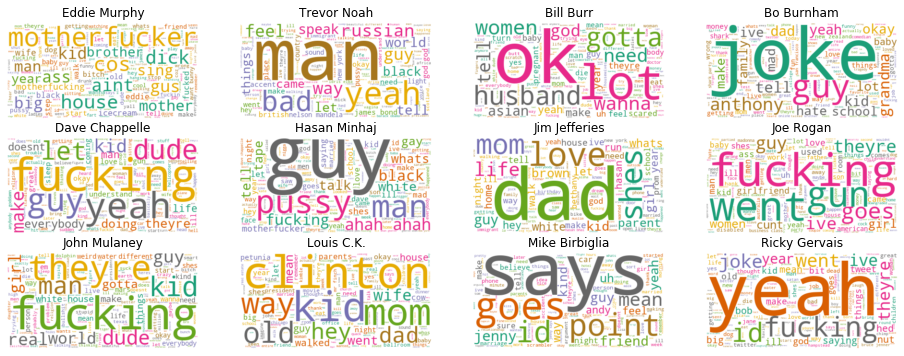

In [163]:
# Output dimensions reset
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Eddie Murphy', 'Trevor Noah', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']


for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### * Findings

* We see that Dave Chappelle, Eddie Murphy, Ricky Gervais and Joe Rogan use a lot of profanity
* Trevor Noah uses the work "man" and "russian" alot while Louis C.K. mentions the Clintons.
* Bill Burr uses the word "ok" and "husband" a lot
* Jim Jefferies uses "mom", "love", "dad"


# What are the number of unique words by comedian?

In [168]:
# count the non zero items in the document matrix and store in a data frame
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)
    
data_words = pd.DataFrame(list(zip(full_names, unique_list)),columns= ['comedians', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/Users/Samrawit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


,comedians,unique_words
3,Bo Burnham,983
0,Eddie Murphy,1074
1,Trevor Noah,1191
7,Joe Rogan,1313
5,Hasan Minhaj,1320
2,Bill Burr,1341
9,Louis C.K.,1389
8,John Mulaney,1435
10,Mike Birbiglia,1494
6,Jim Jefferies,1559


Text(0.5, 1.0, 'Number of Unique Words')

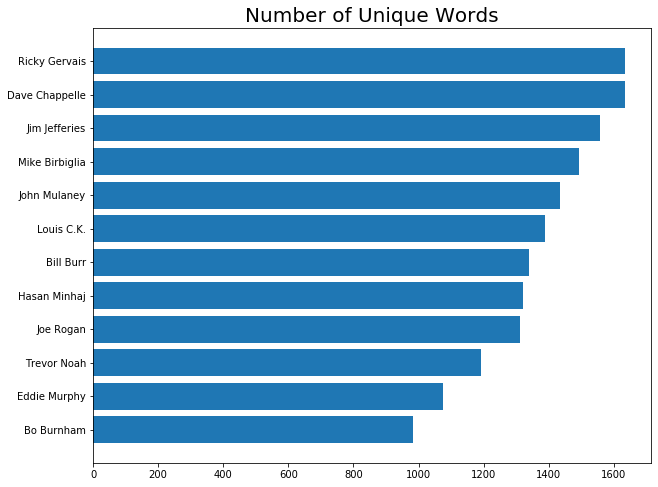

In [169]:
import numpy as np

y_pos =np.arange(len(data_words))

#
plt.barh(y_pos, data_unique_sort.unique_words, align ='center')
plt.yticks(y_pos, data_unique_sort.comedians)
plt.title('Number of Unique Words', fontsize=20)



In [ ]:
plt.show()

## Findings
* The least unique words comes from - Trevor Noah with 983 words
* The most unique words comes from - Ricky Gervais with 1633

## Exploratory Data Analysis of Profanity 


In [165]:
# Common Words
Counter(words).most_common()

[('like', 12),
 ('dont', 12),
 ('know', 12),
 ('got', 12),
 ('im', 12),
 ('just', 12),
 ('thats', 12),
 ('people', 12),
 ('youre', 12),
 ('say', 11),
 ('right', 11),
 ('think', 11),
 ('going', 10),
 ('gonna', 10),
 ('oh', 10),
 ('come', 9),
 ('little', 9),
 ('time', 9),
 ('said', 8),
 ('good', 8),
 ('thing', 8),
 ('shit', 7),
 ('fuck', 7),
 ('look', 7),
 ('really', 7),
 ('want', 7),
 ('theres', 7),
 ('hes', 7),
 ('day', 7),
 ('did', 7),
 ('cause', 7),
 ('didnt', 7),
 ('man', 6),
 ('yeah', 6),
 ('tell', 6),
 ('theyre', 6),
 ('white', 5),
 ('fucking', 5),
 ('guy', 5),
 ('ill', 5),
 ('shes', 5),
 ('house', 4),
 ('baby', 4),
 ('old', 4),
 ('way', 4),
 ('things', 4),
 ('guys', 4),
 ('went', 4),
 ('make', 4),
 ('mom', 4),
 ('okay', 4),
 ('ive', 4),
 ('kid', 4),
 ('goes', 4),
 ('big', 3),
 ('kids', 3),
 ('black', 3),
 ('years', 3),
 ('god', 3),
 ('feel', 3),
 ('gotta', 3),
 ('dude', 3),
 ('uh', 3),
 ('school', 3),
 ('dad', 3),
 ('hey', 3),
 ('whats', 3),
 ('life', 3),
 ('love', 3),
 ('night',

In [166]:
# Only looking at the bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
EddieMurphy,89,143
Trevor Noah,0,3
ali,16,34
anthony,15,9
bill,106,63
dave,59,57
hasan,24,15
jim,115,20
joe,135,40
john,4,6


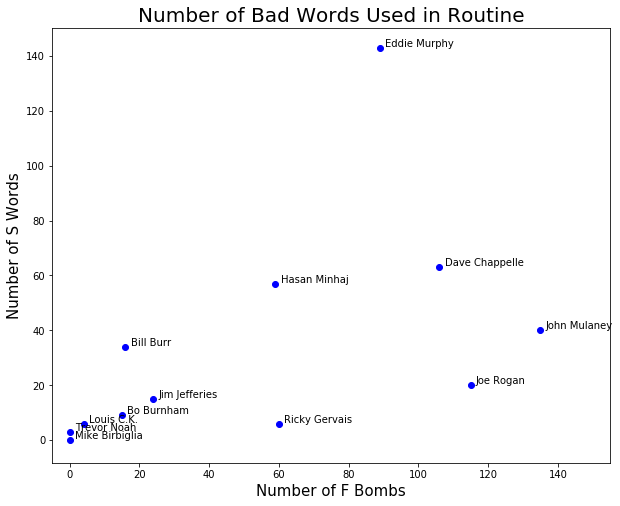

In [167]:
# Visualize findings with scatterplot
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings for profanity
* We see a large evidence of profanity in this data


# Sentiment Analysis

* TextBlob Module: Linguistic researchers labeled the sentiment of words based on their domain knowledge. 
* Sentiment Labels: Each word in a corpus is labeled by polarity and subjectivity 

~
https://planspace.org/20150607-textblob_sentiment/ For more information on TextBlob

* Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.

* Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

## Read in saved corpus 

In [170]:
# Load corpus with original word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...,Eddie Murphy
Trevor Noah,wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this...,Trevor Noah
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Bill Burr
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,Bo Burnham
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,Dave Chappelle
dave,he’s in the trance he isn’t thinking of jokes though he’s composing the voiceover i’m saying to you right now getting me to agree to this was bey...,Hasan Minhaj
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,Jim Jefferies
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Joe Rogan
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,John Mulaney
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...,Louis C.K.


## What is the polarity and subjectivity of each routine?

In [171]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...,Eddie Murphy,-0.102029,0.555897
Trevor Noah,wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this...,Trevor Noah,0.049198,0.477886
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Bill Burr,0.066938,0.482403
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,Bo Burnham,0.054285,0.559732
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,Dave Chappelle,0.017374,0.536474
dave,he’s in the trance he isn’t thinking of jokes though he’s composing the voiceover i’m saying to you right now getting me to agree to this was bey...,Hasan Minhaj,0.002410,0.543321
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,Jim Jefferies,0.090733,0.454879
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Joe Rogan,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,John Mulaney,0.009627,0.551582
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...,Louis C.K.,0.080011,0.484841


### Visualization of results

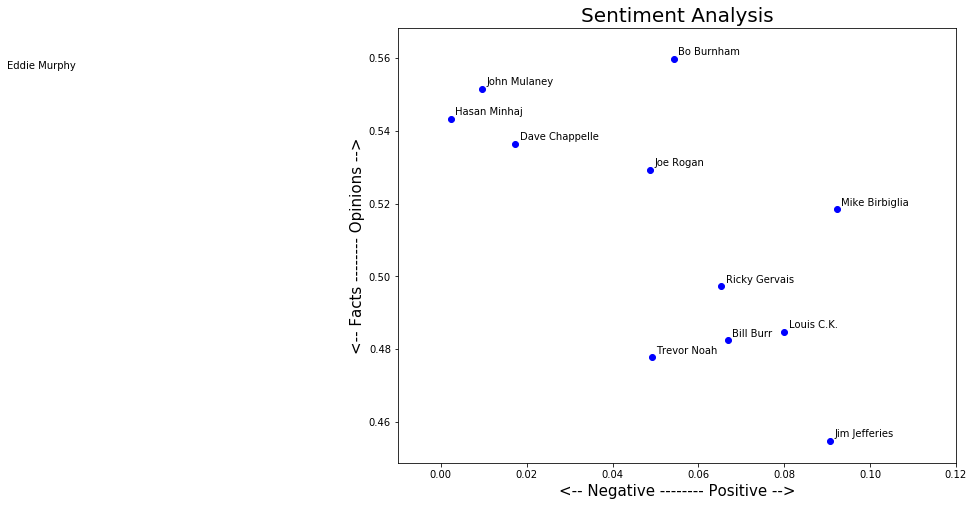

In [172]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Analysis of sentiment 


In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Extract equal sized text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# View Data
data

In [ ]:
# Using list to hold text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

In [ ]:
# List of 10 elements with one for each transcript
len(list_pieces)

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

In [ ]:
# Visualization for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

In [ ]:
# Visualization for all comedian
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Findings
* Trevor Noah, Ali Wong are among the positive in their routines. As well, this is true for Louis C.K. and Mike Birbiglia.
* There is down trend for Dave Chappelle which is revealing of his routines.

# Topic Modeling
* Popular text analysis technique
* Goal of topic modeling is to find various topics that are present in a corpus
* Use Latent Dirichlet Allocation (LDA), which is one of many topic modeling techniques. It was specifically designed for text data.
* To use a topic modeling technique, the following is needed: a document-term matrix and the number of topics you would like the algorithm to pick up.
* After topic modeling technique is applied, we can judge to see if it makes sense. 


### Topic Modeling - Including all of the text

In [179]:
# Load document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaah,aah,abc,abcs,ability,abject,able,ablebodied,aborigines,...,zeppelin,zero,zillion,zombie,zombies,zone,zoning,zoo,zurich,éclair
EddieMurphy,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Trevor Noah,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
ali,0,0,0,1,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,1,0,0,1,0,0,...,0,1,1,1,1,0,1,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
hasan,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1


In [180]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse


In [181]:
# Input a term-document matrix
tdm = data.transpose()
tdm.head()

,EddieMurphy,Trevor Noah,ali,anthony,bill,dave,hasan,jim,joe,john,mike,ricky
aaaaah,1,0,0,0,1,0,0,0,0,0,0,0
aaaah,1,0,0,0,0,0,0,0,0,0,0,0
aah,0,1,0,0,0,0,0,0,0,0,0,0
abc,0,0,1,0,0,0,0,0,0,0,0,0
abcs,0,0,0,0,1,0,0,0,0,0,0,0


In [182]:
# Put the term-document matrix into a new gensim format- gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [183]:
# Specify for Gensim dictionary of the all terms and location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

* With (term-document matrix) and id2word (dictionary of location: term), the following parameters were specified- the number of topics and the number of passes. 
* Changing the number of topics to see if if makes sense. 

In [184]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.012*"fucking" + 0.008*"yeah" + 0.007*"theyre" + 0.006*"went" + 0.005*"man" + 0.004*"ive" + 0.004*"god" + 0.004*"ill" + 0.004*"way" + 0.004*"life"'),
 (1,
  '0.004*"tell" + 0.004*"yeah" + 0.004*"dad" + 0.004*"hey" + 0.004*"man" + 0.004*"guys" + 0.003*"shes" + 0.003*"house" + 0.003*"school" + 0.003*"says"')]

In [185]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.000*"fucking" + 0.000*"yeah" + 0.000*"went" + 0.000*"man" + 0.000*"theyre" + 0.000*"love" + 0.000*"guy" + 0.000*"tell" + 0.000*"ill" + 0.000*"lot"'),
 (1,
  '0.009*"fucking" + 0.006*"yeah" + 0.006*"theyre" + 0.005*"man" + 0.004*"went" + 0.004*"tell" + 0.004*"guy" + 0.004*"goes" + 0.004*"shes" + 0.004*"way"'),
 (2,
  '0.006*"yeah" + 0.005*"went" + 0.005*"joke" + 0.004*"fucking" + 0.004*"ive" + 0.004*"theyre" + 0.004*"motherfucker" + 0.004*"big" + 0.004*"house" + 0.004*"years"')]

In [186]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.006*"man" + 0.005*"yeah" + 0.005*"tell" + 0.005*"motherfucker" + 0.004*"black" + 0.004*"guys" + 0.004*"god" + 0.004*"baby" + 0.004*"ive" + 0.004*"bad"'),
 (1,
  '0.007*"clinton" + 0.005*"hey" + 0.004*"mom" + 0.004*"way" + 0.004*"old" + 0.004*"cow" + 0.004*"went" + 0.004*"wife" + 0.003*"dad" + 0.003*"real"'),
 (2,
  '0.013*"fucking" + 0.007*"yeah" + 0.007*"theyre" + 0.006*"man" + 0.006*"guy" + 0.005*"dude" + 0.005*"make" + 0.004*"kids" + 0.004*"white" + 0.004*"whats"'),
 (3,
  '0.008*"fucking" + 0.007*"went" + 0.006*"yeah" + 0.006*"goes" + 0.005*"theyre" + 0.005*"ive" + 0.005*"id" + 0.004*"shes" + 0.004*"says" + 0.004*"love"')]

## Findings - The topics are not looking to great 
* These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Looking at just the Nouns
* Use UPenn tag set to look at words based on part of speech like nouns, only adjectives, etc. https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [187]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [188]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...
Trevor Noah,wow wow oh wow whats happening new york yeah oh this is amazing thank you for coming out were gonna have fun tonight welcome to it people this i...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
dave,hes in the trance he isnt thinking of jokes though hes composing the voiceover im saying to you right now getting me to agree to this was beyond ...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...


In [189]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
EddieMurphy,august dar constitution hall washington dc ladies gentlemen murphy thank times times i round applause bus rules rules i standup i rules faggots ar...
Trevor Noah,wow wow wow whats york yeah thank na welcome people dream i comedy york city york york im york i city people everyone street taxi hood im walking ...
ali,ladies gentlemen stage ali hi thank hello na shit cause i ten minutes thank day year year people uh i im i girl thought im foremost metabolism gir...
anthony,thank thank people i em i francisco city world im stage place cities place bit today baby baby back car day dont monster i baby rock window window...
bill,thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade man hell life shape man hate gym id week brutal i o...
dave,hes trance thinking jokes hes voiceover im dreams opportunity voicemail genius chappelle right message ♪ workinonit ♪ ♪ ♪ tune ♪ ♪ ♪ ♪ whoo ♪ ♪ i ...
hasan,whats davis whats home i netflix la york i son davis california um year claps lord rings situation i ring powers lord rings compromise ring movie ...
jim,ladies gentlemen stage mr jim jefferies thank thats end tour tour i child ah time home i girlfriend pregnant months life decisions girl i way prob...
joe,ladies gentlemen joe fuck thanks phone fuckface i phone motherfuckers eyes goddamn phone whoo whoo strange i i im move francisco pot people edible...
john,petunia thats hello hello chicago thank crowd energy show okay thank crowds energy beginning places judge crowds way room birthday sign wait poste...


In [190]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaah,abc,abcs,ability,aborigines,abortion,abuse,accent,accents,acceptance,...,zelda,zeppelin,zero,zillion,zombie,zombies,zone,zoo,zurich,éclair
EddieMurphy,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Trevor Noah,0,0,0,0,1,0,0,14,6,0,...,1,0,0,0,0,0,0,0,1,0
ali,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [192]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"thing" + 0.009*"day" + 0.008*"way" + 0.008*"man" + 0.007*"cause" + 0.007*"gon" + 0.007*"hes" + 0.007*"shit" + 0.006*"guy" + 0.006*"life"'),
 (1,
  '0.012*"shit" + 0.010*"fuck" + 0.008*"man" + 0.008*"day" + 0.007*"hes" + 0.006*"thing" + 0.006*"years" + 0.006*"house" + 0.005*"shes" + 0.005*"gon"')]

In [193]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.014*"shit" + 0.013*"fuck" + 0.012*"man" + 0.010*"thing" + 0.009*"day" + 0.008*"hes" + 0.008*"gon" + 0.007*"house" + 0.007*"way" + 0.007*"guy"'),
 (1,
  '0.001*"shit" + 0.001*"hes" + 0.001*"man" + 0.001*"thing" + 0.000*"way" + 0.000*"gon" + 0.000*"fuck" + 0.000*"guy" + 0.000*"point" + 0.000*"cause"'),
 (2,
  '0.009*"day" + 0.007*"shit" + 0.007*"thing" + 0.007*"way" + 0.006*"dad" + 0.006*"hes" + 0.006*"school" + 0.006*"man" + 0.006*"cause" + 0.006*"years"')]

In [194]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"day" + 0.009*"thing" + 0.008*"man" + 0.007*"fuck" + 0.007*"shit" + 0.007*"joke" + 0.007*"hes" + 0.007*"dad" + 0.006*"shes" + 0.006*"guy"'),
 (1,
  '0.018*"shit" + 0.013*"man" + 0.013*"fuck" + 0.009*"gon" + 0.009*"hes" + 0.008*"thing" + 0.008*"day" + 0.007*"house" + 0.007*"dude" + 0.007*"way"'),
 (2,
  '0.009*"cause" + 0.008*"way" + 0.007*"day" + 0.007*"kind" + 0.007*"point" + 0.006*"night" + 0.006*"clinton" + 0.006*"thing" + 0.006*"house" + 0.006*"hey"'),
 (3,
  '0.001*"shit" + 0.001*"guy" + 0.001*"cause" + 0.001*"fuck" + 0.001*"hes" + 0.001*"way" + 0.001*"day" + 0.001*"man" + 0.001*"gon" + 0.001*"house"')]

## Topic Modeling - Looking at both the Nouns and Adjectives

In [197]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [198]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
EddieMurphy,august dar constitution hall washington dc ladies gentlemen murphy thank times times i big round applause bus rules rules i standup i rules shit f...
Trevor Noah,wow wow wow whats new york yeah amazing thank na tonight welcome people second dream i standup comedy special new york city new york new york yeah...
ali,ladies gentlemen welcome stage ali wong hi welcome thank hello hello na shit cause i like ten minutes thank much um exciting day exciting year yea...
anthony,thank san francisco thank good people surprised i em i special san francisco correct city world im stage place favorite cities good place little b...
bill,right thank thank pleasure greater atlanta georgia area oasis nice i i june nice wasnt miserable horrible kind heat racism i anybody look em cold ...
dave,hes trance thinking jokes hes voiceover im wildest dreams opportunity frivolous voicemail comedic genius chappelle wont speak right please detaile...
hasan,whats davis whats im home i netflix special la chicago new york i nah son davis california um good year married claps heavy heavy reverse lord rin...
jim,ladies gentlemen welcome stage mr jim jefferies thank i uh thats end tour im happy tour i child ah time home good um i girlfriend pregnant months ...
joe,ladies gentlemen joe fuck san francisco thanks i phone fuckface i phone motherfuckers eyes ta goddamn phone whoo high fuck whoo strange i sure i i...
john,right petunia august thats good right hello hello chicago nice nice thank wonderful crowd energy entire show okay thank crowds big energy beginnin...


In [199]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaah,abc,abcs,ability,abject,able,ablebodied,aborigines,abortion,...,zelda,zeppelin,zero,zillion,zombie,zombies,zone,zoo,zurich,éclair
EddieMurphy,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trevor Noah,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
ali,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
hasan,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [200]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [201]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.011*"fuck" + 0.005*"motherfucker" + 0.004*"joke" + 0.003*"cos" + 0.003*"dick" + 0.003*"gun" + 0.003*"pussy" + 0.003*"wife" + 0.003*"guns" + 0.003*"dog"'),
 (1,
  '0.008*"fuck" + 0.006*"mom" + 0.005*"kind" + 0.004*"parents" + 0.003*"mad" + 0.003*"joke" + 0.003*"pussy" + 0.002*"york" + 0.002*"hasan" + 0.002*"wife"')]

In [202]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"fuck" + 0.005*"gun" + 0.004*"guns" + 0.004*"british" + 0.003*"class" + 0.003*"son" + 0.003*"accent" + 0.003*"russian" + 0.003*"pussy" + 0.003*"mandela"'),
 (1,
  '0.010*"fuck" + 0.007*"motherfucker" + 0.005*"mom" + 0.005*"pussy" + 0.004*"wife" + 0.004*"kind" + 0.004*"joke" + 0.004*"mad" + 0.003*"dick" + 0.003*"parents"'),
 (2,
  '0.010*"fuck" + 0.004*"hasan" + 0.004*"mom" + 0.004*"joke" + 0.004*"parents" + 0.003*"water" + 0.003*"kind" + 0.003*"jenner" + 0.003*"brown" + 0.002*"weird"')]

In [203]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"joke" + 0.005*"clinton" + 0.004*"president" + 0.004*"british" + 0.004*"mom" + 0.004*"cow" + 0.003*"york" + 0.003*"bond" + 0.003*"russian" + 0.003*"mandela"'),
 (1,
  '0.011*"pussy" + 0.010*"fuck" + 0.006*"tape" + 0.006*"banana" + 0.005*"gay" + 0.005*"motherfucker" + 0.005*"mad" + 0.005*"ahah" + 0.004*"chappelle" + 0.004*"wife"'),
 (2,
  '0.013*"fuck" + 0.009*"motherfucker" + 0.006*"mom" + 0.006*"cos" + 0.005*"hasan" + 0.004*"dick" + 0.004*"icecream" + 0.004*"ok" + 0.004*"husband" + 0.003*"mother"'),
 (3,
  '0.013*"fuck" + 0.006*"kind" + 0.005*"joke" + 0.004*"gun" + 0.003*"guns" + 0.003*"jenny" + 0.003*"class" + 0.003*"weird" + 0.003*"anthony" + 0.003*"dick"')]

# Identify Topics in Each Document
* Out of the 9 topic models with different number observed, the nouns and adjectives  #4 topic one made the most sense. Lets further look at the #4 number of topics

# Final LDA model - 4TH NUMBER OF TOPICS

In [204]:

ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.016*"fuck" + 0.007*"joke" + 0.006*"kind" + 0.004*"anthony" + 0.004*"gun" + 0.004*"weird" + 0.004*"stupid" + 0.004*"religion" + 0.004*"mad" + 0.004*"mom"'),
 (1,
  '0.008*"fuck" + 0.006*"pussy" + 0.004*"york" + 0.004*"hasan" + 0.004*"guns" + 0.003*"son" + 0.003*"country" + 0.003*"british" + 0.003*"mom" + 0.003*"class"'),
 (2,
  '0.009*"fuck" + 0.007*"motherfucker" + 0.004*"joke" + 0.004*"cos" + 0.004*"jenny" + 0.004*"kind" + 0.003*"icecream" + 0.003*"husband" + 0.003*"ok" + 0.003*"dick"'),
 (3,
  '0.010*"clinton" + 0.008*"mom" + 0.007*"cow" + 0.006*"wife" + 0.005*"parents" + 0.005*"president" + 0.004*"john" + 0.004*"movie" + 0.004*"finch" + 0.004*"ballroom"')]

In [205]:
#Topics included
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'EddieMurphy'),
 (1, 'Trevor Noah'),
 (2, 'ali'),
 (0, 'anthony'),
 (0, 'bill'),
 (1, 'dave'),
 (1, 'hasan'),
 (1, 'jim'),
 (0, 'joe'),
 (3, 'john'),
 (2, 'mike'),
 (2, 'ricky')]

### Findings
* For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: Profanity, gun, religion [Anthony, Bill, Joe]
* Topic 1: Profanity, Guns, son, country, british [Trevor, Dave, Hasan, Jim]
* Topic 2: Profanity [EddieMurphy, Mike, Jim]
* Topic 3: Clinton, mom, cow, wife, parents [John]

# Text Generation - Predicting the next text of Trevor Noah

* Markov chains makes the assumption that the next word is only dependent on the previous word .


* Select Text to Imitate text in the style of Trevor Noah

In [206]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
EddieMurphy,filmed on august at dar constitution hall in washington dc ladies and gentlemen eddie murphy thank you thank you so much two times far two times...,Eddie Murphy
Trevor Noah,wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this...,Trevor Noah
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Bill Burr
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,Bo Burnham
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,Dave Chappelle
dave,he’s in the trance he isn’t thinking of jokes though he’s composing the voiceover i’m saying to you right now getting me to agree to this was bey...,Hasan Minhaj
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,Jim Jefferies
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Joe Rogan
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,John Mulaney
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...,Louis C.K.


In [209]:
# Extract only Trevors text
Trevor_text = data.transcript.loc['Trevor Noah'] # select by row
Trevor_text[:200]

'  wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is us can i tell you for a second this has been my dr'

## Markov Chain Function
* Create a Markov chain function that creates a dictionary:
* The keys are the words in the corpus
* The values are list of words 

In [210]:
from collections import defaultdict

def markov_chain(text):
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [211]:
# Create the dictionary for Trevor's routine, take a look at it
Trevor_text_dict = markov_chain(Trevor_text)
Trevor_text_dict

{'': ['',
  'wow',
  'yeah',
  'that',
  '“i’m',
  '“hey',
  '“hey',
  '“come',
  'blocks',
  'i’ll',
  'sounds',
  '“that’s',
  'white',
  '“darius',
  '',
  '“hear',
  '“this',
  '“she’s',
  'that’s',
  '“oh',
  '“i',
  'license',
  'and',
  '“racism”',
  'blowing',
  'the',
  'the',
  'idris',
  'james',
  'the',
  '“how',
  '“james',
  '“all',
  'you',
  '',
  'i',
  'it',
  'had',
  'but',
  'there’s',
  'no',
  'it’s',
  'oh',
  'oh',
  'and',
  '“good',
  'and',
  '“i',
  'it',
  'years',
  '“imagine',
  'no',
  'i',
  '“i',
  '“lower',
  '',
  '“no',
  '“that’s',
  '“that’s',
  '“america”',
  'i’d',
  '',
  '“i',
  '“oh',
  '“yeah',
  '“we',
  'you',
  '“you',
  '“what”',
  'done',
  'that',
  '',
  'russian'],
 'wow': ['wow', 'oh', 'what’s'],
 'oh': ['wow',
  'this',
  'lord',
  'yeah',
  'yeah',
  'it’s',
  'please',
  'please',
  'man',
  'my',
  'my',
  'i'],
 'what’s': ['happening',
  'wrong',
  'wrong',
  'going',
  'theirs',
  'going',
  'wrong'],
 'happening': ['new', '

# Findings- Create a Text Generator
* To create sentences this funtion will have the following: input of the dictionary as a key and value and the number of words we would like have generated


In [216]:
import random

def generateSentences(chain, count=15):

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [217]:
generateSentences(Trevor_text_dict)

'Constantly under the sidewalk and i was it was like to do you know it’s.'